In [1]:
%matplotlib inline

In [2]:
import pycircos
import matplotlib.pyplot as plt
from Bio import SeqIO 
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle

In [3]:
record = SeqIO.read("sample_data/NC_000913.gbk", format="genbank")
garc   = Garc(arc_id="NC_000913", record=record, interspace=0, linewidth=0, 
              facecolor="#FFFFFF00", raxis_range=(0,10), 
              label="Escherichia coli str. K-12 substr. MG1655", label_visible=True)

<Figure size 576x576 with 0 Axes>

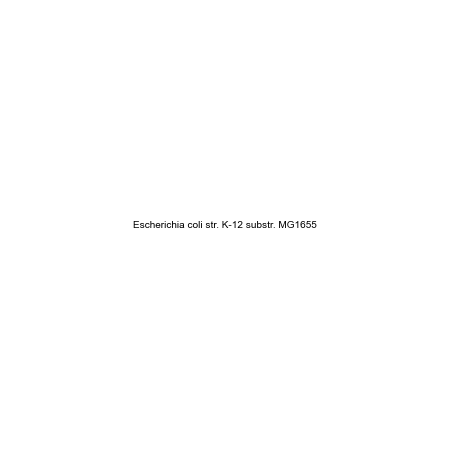

In [4]:
gcircle = Gcircle()
gcircle.add_garc(garc)
gcircle.set_garcs()

In [5]:
#Plot CDS
plus_CDS  = [] 
minus_CDS = [] 
for feat in garc.record.features:
    if feat.type == "CDS" and feat.strand >= 0:
        plus_CDS.append(feat)
    elif feat.strand == -1:
        minus_CDS.append(feat)
gcircle.featureplot("NC_000913", source=plus_CDS,  raxis_range=(700,780), facecolor="tomato")
gcircle.featureplot("NC_000913", source=minus_CDS, raxis_range=(780,860), facecolor="cornflowerblue")

In [6]:
#Plot GCskew
import copy
skews = garc.calc_nnskew(n1="G", n2="C")  
positive_skews=copy.deepcopy(skews)
positive_skews[skews<0]=0
negative_skews=copy.deepcopy(skews)
negative_skews[skews>=0]=0
gcircle.fillplot("NC_000913", positive_skews, rlim=(min(skews),max(skews)), base_value=0, raxis_range=(400,700), facecolor="r")
gcircle.fillplot("NC_000913", negative_skews, rlim=(min(skews),max(skews)), base_value=0, raxis_range=(400,700), facecolor="b")

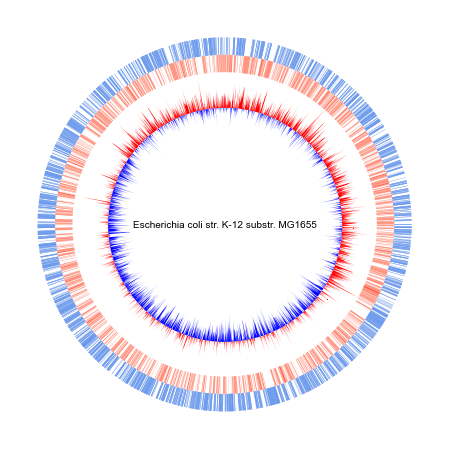

In [7]:
gcircle.figure